In [32]:
import cartolafc
import pprint
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
# Criando um objeto para trabalhar
# Logando para acessar todas as funcionalidades
api = cartolafc.Api()
login = api.set_credentials('robson.s.macedo@gmail.com', 'bradesco11')

In [ ]:
# extraindo dados dos clubes
# extraindo dados das partidas
# extraindo dados dos atletas
# trazendo meus dados para comprar de acordo com a minha realidade
# Armazenando os dados das pontuacoes dos atletas em uma lista
clubes = api.clubes()
# trocar esse range final em cada rodada
partidas = [api.partidas(i) for i in range(1, 27)]
atletas = api.mercado_atletas()
meusDados = api.time_logado() 
IdsAtletas = [x.id for x in atletas]
pontuacoesAtletas = [api.pontuacao_atleta(i) for i in IdsAtletas]

In [62]:
# montar dicionario para facilitar montagem do Dataframe de PONTUACOES
atleta_id = list()
rodada_id  =list()
pontos = list()
preco = list()
variacao = list()
media = list()
for i in pontuacoesAtletas:
    for j in i:
        atleta_id.append(j.atleta_id)
        rodada_id.append(j.rodada_id)
        pontos.append(j.pontos)
        preco.append(j.preco)
        variacao.append(j.variacao)
        media.append(j.media)
        
pontuacoesAtletas_dict = {}
pontuacoesAtletas_dict['atleta_id'] = atleta_id
pontuacoesAtletas_dict['rodada_id'] = rodada_id
pontuacoesAtletas_dict['pontos'] = pontos
pontuacoesAtletas_dict['preco'] = preco
pontuacoesAtletas_dict['variacao'] = variacao
pontuacoesAtletas_dict['media'] = media

# Montando o DF para as pontuações dos atletas
pontuacoesAtletas_df = pd.DataFrame(pontuacoesAtletas_dict)


In [63]:
# testes até nas proximas 4linhas
pontuacoesAtletas_df.groupby('atleta_id')['media'].mean().max()

12.024166666666666

In [64]:
pontuacoesAtletas_df[pontuacoesAtletas_df.media == 12.02]

,atleta_id,rodada_id,pontos,preco,variacao,media
7135,87863,21,16.7,19.33,1.28,12.02


In [65]:
for i in atletas:
    if i.id == 87863:
        print(i.apelido)

Arrascaeta


In [66]:
# preparando para criar o DF de dados dos ATLETAS
ident = list()
apelido = list()
pontos = list()
scout = list()
posicao = list()
clube = list()
status = list()
for i in atletas:
    ident.append(i.id)
    apelido.append(i.apelido)
    pontos.append(i.pontos)
    scout.append(i.scout)
    posicao.append(i.posicao[2])
    clube.append(i.clube.abreviacao)
    status.append(i.status[1])
    
# Criando o dicionario
atletas_dict = {}
atletas_dict['id'] = ident
atletas_dict['apelido'] = apelido
atletas_dict['ult_pontuacao']  =pontos
atletas_dict['scout'] = scout
atletas_dict['posicao'] = posicao
atletas_dict['clube'] = clube
atletas_dict['status'] = status

# Criando um DF para os atletas
atletas_df = pd.DataFrame(atletas_dict)

In [67]:
atletas[0]

{"id": 101803, "apelido": "Carlos Augusto", "pontos": 0, "scout": null, "posicao": [2, "Lateral", "lat"], "clube": {"id": 264, "nome": "Corinthians", "abreviacao": "COR"}, "status": [6, "Nulo"], "is_capitao": null}

In [68]:
atletas_df.head()

,id,apelido,ult_pontuacao,scout,posicao,clube,status
0,101803,Carlos Augusto,0,None,lat,COR,Nulo
1,101720,Miranda,0,None,zag,VAS,Nulo
2,101719,Rafael França,0,None,lat,VAS,Nulo
3,101728,Diego,0,None,zag,SAO,Nulo
4,101729,Fabinho,0,None,ata,SAO,Nulo


In [69]:
# montar um DF para partidas
data = list()
local = list()
clube_casa = list()
clube_casa_placar = list()
clube_visitante = list()
clube_visitante_placar = list()
for i in range(11, len(partidas)):
    for j in range(0, 9):
        data.append(partidas[i][j].data)
        local.append(partidas[i][j].local)
        clube_casa.append(partidas[i][j].clube_casa.abreviacao)
        clube_visitante.append(partidas[i][j].clube_visitante.abreviacao)
        if partidas[i][j].placar_casa == None or partidas[i][j].placar_visitante == None:
            clube_casa_placar.append(-1)
            clube_visitante_placar.append(-1)
        else:
            clube_casa_placar.append(partidas[i][j].placar_casa)
            clube_visitante_placar.append(partidas[i][j].placar_visitante)
        
partidas_dict = {}
partidas_dict['data'] = data
partidas_dict['local'] = local
partidas_dict['clube_casa'] = clube_casa
partidas_dict['clube_casa_placar'] = clube_casa_placar
partidas_dict['clube_visitante'] = clube_visitante
partidas_dict['clube_visitante_placar'] = clube_visitante_placar

partidas_df = pd.DataFrame(partidas_dict)

In [70]:
partidas_df.head(5)

,data,local,clube_casa,clube_casa_placar,clube_visitante,clube_visitante_placar
0,2019-07-27 17:00:00,Arena Palmeiras,PAL,1,VAS,1
1,2019-07-27 19:00:00,Beira-Rio,INT,1,CEA,0
2,2019-07-27 19:00:00,Mineirão,CRU,0,ATL,2
3,2019-07-27 19:00:00,Maracanã,FLU,1,SAO,2
4,2019-07-28 11:00:00,Arena Condá,CHA,0,BAH,0


In [71]:
# setando o tamanho correto para partidas_df
partidas_df = partidas_df.iloc[18:, :]

In [72]:
todos_os_jogos = partidas_df.clube_casa.values

In [73]:
todos_os_jogos

array(['CEA', 'SAO', 'FLA', 'ATL', 'INT', 'PAL', 'BOT', 'AVA', 'GOI',
       'FOR', 'COR', 'VAS', 'ATL', 'GRE', 'CRU', 'SAO', 'FLU', 'BAH',
       'ATL', 'GRE', 'SAN', 'VAS', 'GOI', 'CEA', 'AVA', 'CSA', 'BOT',
       'SAO', 'BAH', 'CHA', 'ATL', 'INT', 'FOR', 'FLA', 'CRU', 'COR',
       'COR', 'VAS', 'FOR', 'AVA', 'INT', 'GOI', 'CRU', 'SAN', 'BOT',
       'FLA', 'PAL', 'CHA', 'CEA', 'ATL', 'ATL', 'GRE', 'FLU', 'BAH',
       'BOT', 'CRU', 'COR', 'SAN', 'INT', 'FOR', 'VAS', 'CSA', 'GOI',
       'CEA', 'SAO', 'FLA', 'BAH', 'PAL', 'GRE', 'FLU', 'ATL', 'ATL',
       'FLA', 'COR', 'INT', 'SAN', 'FLU', 'ATL', 'ATL', 'FOR', 'AVA',
       'SAO', 'VAS', 'GRE', 'BAH', 'CRU', 'CHA', 'CEA', 'PAL', 'BOT',
       'BOT', 'CSA', 'FOR', 'GRE', 'BAH', 'CRU', 'SAN', 'COR', 'AVA',
       'GOI', 'FLU', 'PAL', 'INT', 'CEA', 'VAS', 'ATL', 'SAO', 'ATL',
       'GRE', 'CSA', 'FOR', 'CRU', 'PAL', 'VAS', 'GOI', 'SAN', 'AVA'],
      dtype=object)

In [74]:
# separando os times da casa em listas
ini = 0
fim = 9
timesPorRodada = []
for i in range(14, 27):
    timesPorRodada.append((list(todos_os_jogos[ini:fim])))
    ini = ini + 9
    fim = fim + 9
    
print(timesPorRodada)
    

[['CEA', 'SAO', 'FLA', 'ATL', 'INT', 'PAL', 'BOT', 'AVA', 'GOI'], ['FOR', 'COR', 'VAS', 'ATL', 'GRE', 'CRU', 'SAO', 'FLU', 'BAH'], ['ATL', 'GRE', 'SAN', 'VAS', 'GOI', 'CEA', 'AVA', 'CSA', 'BOT'], ['SAO', 'BAH', 'CHA', 'ATL', 'INT', 'FOR', 'FLA', 'CRU', 'COR'], ['COR', 'VAS', 'FOR', 'AVA', 'INT', 'GOI', 'CRU', 'SAN', 'BOT'], ['FLA', 'PAL', 'CHA', 'CEA', 'ATL', 'ATL', 'GRE', 'FLU', 'BAH'], ['BOT', 'CRU', 'COR', 'SAN', 'INT', 'FOR', 'VAS', 'CSA', 'GOI'], ['CEA', 'SAO', 'FLA', 'BAH', 'PAL', 'GRE', 'FLU', 'ATL', 'ATL'], ['FLA', 'COR', 'INT', 'SAN', 'FLU', 'ATL', 'ATL', 'FOR', 'AVA'], ['SAO', 'VAS', 'GRE', 'BAH', 'CRU', 'CHA', 'CEA', 'PAL', 'BOT'], ['BOT', 'CSA', 'FOR', 'GRE', 'BAH', 'CRU', 'SAN', 'COR', 'AVA'], ['GOI', 'FLU', 'PAL', 'INT', 'CEA', 'VAS', 'ATL', 'SAO', 'ATL'], ['GRE', 'CSA', 'FOR', 'CRU', 'PAL', 'VAS', 'GOI', 'SAN', 'AVA']]


In [75]:
atletas_df.shape

(825, 7)

In [76]:
pontuacoesAtletas_df.shape

(9900, 6)

In [77]:
pontuacoesAtletas_df.rename(columns={'atleta_id':'id'}, inplace=True)

In [118]:
df_join = pontuacoesAtletas_df.merge(atletas_df, on='id')

In [119]:
df_join.shape[0]

9900

In [120]:
len(timesPorRodada)

13

In [121]:
(df_join.rodada_id == 14).sum()

825

In [122]:
df_join.head()

,id,rodada_id,pontos,preco,variacao,media,apelido,ult_pontuacao,scout,posicao,clube,status
0,101803,14,0.0,5.59,0.00,4.23,Carlos Augusto,0,None,lat,COR,Nulo
1,101803,15,5.1,5.74,0.15,4.45,Carlos Augusto,0,None,lat,COR,Nulo
2,101803,16,0.7,5.02,-0.72,3.70,Carlos Augusto,0,None,lat,COR,Nulo
3,101803,17,0.0,5.02,0.00,3.70,Carlos Augusto,0,None,lat,COR,Nulo
4,101803,18,0.0,4.81,-0.21,3.08,Carlos Augusto,0,None,lat,COR,Nulo


In [123]:
len(timesPorRodada)

13

In [124]:
# Criando coluna para verificar se o time jogou dentro ou fora de casa
em_casa = []
for i, rodada in zip(range(0, 12), range(14, 26)):
    for j in range(0, 825):
        if df_join[df_join['rodada_id'] == rodada]['clube'].values[j] in timesPorRodada[i]:
            em_casa.append(1)
        else: 
            em_casa.append(0)
df_join['em_casa'] = em_casa

In [125]:
# aplicação correta
df_join.tail(5)

,id,rodada_id,pontos,preco,variacao,media,apelido,ult_pontuacao,scout,posicao,clube,status,em_casa
9895,105396,21,0.0,1.0,0.0,0.0,Rafael Barbosa,0,None,mei,GOI,Nulo,1
9896,105396,22,0.0,1.0,0.0,0.0,Rafael Barbosa,0,None,mei,GOI,Nulo,0
9897,105396,23,0.0,1.0,0.0,0.0,Rafael Barbosa,0,None,mei,GOI,Nulo,1
9898,105396,24,0.0,1.0,0.0,0.0,Rafael Barbosa,0,None,mei,GOI,Nulo,1
9899,105396,25,0.0,1.0,0.0,0.0,Rafael Barbosa,0,None,mei,GOI,Nulo,1


In [126]:
# preeechendo dados da última rodada que vieram como None
df_join.fillna(-1,  inplace=True)

In [127]:
# gerando uma coluna para tamanho do scout
# não está entrando nas previsões
'''lista_scout = []
for i in df_join.scout:
    lista_scout.append(len(i))
df_join['tam_scout'] = lista_scout'''

"lista_scout = []\nfor i in df_join.scout:\n    lista_scout.append(len(i))\ndf_join['tam_scout'] = lista_scout"

In [128]:
# analisando os jogadores por posição pela diferença 
meias = df_join[df_join.posicao == 'mei']

In [129]:
# verificando os melhores por rodada
melhores_meias = meias.groupby(['rodada_id'], sort = True)['pontos'].max()


In [130]:
melhores_meias

rodada_id
14    24.7
15    16.1
16    14.4
17    17.6
18    14.9
19    15.8
20    13.4
21    20.0
22    13.8
23    16.5
24    12.7
25    11.4
Name: pontos, dtype: float64

In [131]:
melhores_meias_tuplas = [(i, j) for i, j in zip(melhores_meias.index, melhores_meias.values)]

In [132]:
melhores_meias_tuplas[0][1]

24.7

In [133]:
# melhores meias por rodada
for i in melhores_meias_tuplas:
    print(f"Na rodada {i[0]} o melhor zagueiro foi {meias[(meias.rodada_id == i[0]) & (meias.pontos == i[1])]['apelido'].values}")

Na rodada 14 o melhor zagueiro foi ['Thiago Galhardo']
Na rodada 15 o melhor zagueiro foi ['Thiago Neves']
Na rodada 16 o melhor zagueiro foi ['Thaciano']
Na rodada 17 o melhor zagueiro foi ['Arrascaeta']
Na rodada 18 o melhor zagueiro foi ['Léo Sena']
Na rodada 19 o melhor zagueiro foi ['Bruninho']
Na rodada 20 o melhor zagueiro foi ['João Paulo']
Na rodada 21 o melhor zagueiro foi ['Bruno Henrique']
Na rodada 22 o melhor zagueiro foi ['Élber']
Na rodada 23 o melhor zagueiro foi ['Léo Cittadini']
Na rodada 24 o melhor zagueiro foi ['Léo Cittadini']
Na rodada 25 o melhor zagueiro foi ['Alisson']


In [134]:
meias.head()

,id,rodada_id,pontos,preco,variacao,media,apelido,ult_pontuacao,scout,posicao,clube,status,em_casa
96,101716,14,0.0,1.53,0.0,0.57,Bruninho,0,-1,mei,ATL,Nulo,0
97,101716,15,0.0,1.53,0.0,0.57,Bruninho,0,-1,mei,ATL,Nulo,0
98,101716,16,0.0,1.53,0.0,0.57,Bruninho,0,-1,mei,ATL,Nulo,0
99,101716,17,0.0,1.53,0.0,0.57,Bruninho,0,-1,mei,ATL,Nulo,0
100,101716,18,0.0,1.53,0.0,0.57,Bruninho,0,-1,mei,ATL,Nulo,0


In [135]:
grafico = meias.groupby('em_casa').pontos.sum()

In [136]:
grafico

em_casa
0    1491.8
1    1300.7
Name: pontos, dtype: float64

<BarContainer object of 2 artists>

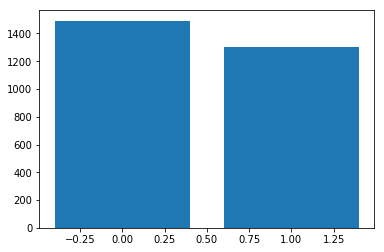

In [139]:
# meias fazem mais pontos fora de casa
plt.bar(grafico.index, grafico.values, data = meias)

In [140]:
# quero os três melhores da rodada para ficar compatível com minha $$$$
meiasEmOrdem = meias.sort_values(['rodada_id', 'pontos'], ascending=[True, False])
meiasEmOrdem.head()

tupla_pontos_apelido = [(i, j) for i, j in zip(meiasEmOrdem['pontos'].values, meiasEmOrdem['apelido'].values)]
    

Text(0.5, 1.0, 'Pontuação dos meias X Rodada')

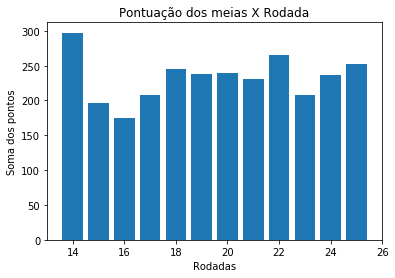

In [141]:
#Pontos dos meias por rodada
meias_pontuadores = meiasEmOrdem.groupby('rodada_id').pontos.sum()
plt.bar(meias_pontuadores.index, meias_pontuadores.values)
plt.xlabel('Rodadas')
plt.ylabel('Soma dos pontos')
plt.title('Pontuação dos meias X Rodada')

In [142]:
meiasEmOrdem.rodada_id.value_counts()

25    274
23    274
21    274
19    274
17    274
15    274
24    274
22    274
20    274
18    274
16    274
14    274
Name: rodada_id, dtype: int64

In [143]:
# com essa biblioteca consigo pegar os tre melhores por setor
import heapq

In [160]:
# refatorado aqui

rodadas = []
for x in range(14, 26):
    rodadas.append([j for i, j in zip(meiasEmOrdem.rodada_id, meiasEmOrdem.pontos) if i == x])


colunaTitular = []

for rodada in rodadas:
    for i in rodada:
        if i in heapq.nlargest(5, rodada):
            colunaTitular.append(1)
        else:
            colunaTitular.append(0)

        
print(len(colunaTitular))


3288


In [161]:
meiasEmOrdem['titular'] = colunaTitular

In [162]:
meiasEmOrdem.drop('scout', axis = 1, inplace=True)

KeyError: "['scout'] not found in axis"

In [163]:
meiasEmOrdem.dropna(axis = 0, how = 'any', inplace = True)

In [164]:
# Setando os atributos previsores
# considerando: O preço, a média e se joga em casa
X = meiasEmOrdem.iloc[:,[3, 5, 11]].values

In [165]:
meiasEmOrdem.shape

(3288, 13)

In [166]:
y = meiasEmOrdem.iloc[:, 12].values

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [168]:
# Rodando o modelo RANDONFOREST em 10 ciclos com 100 arvores
resultados = []
for i in range(0, 10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = i)
    modelo = RandomForestClassifier(n_estimators=100, n_jobs=1)
    modelo.fit(X_train, y_train)
    predicao = modelo.predict(X_test)
    resultados.append(accuracy_score(y_test, predicao))
print(np.mean(resultados))

0.9819148936170212
